### Aim: To find whether there is a correlation between the files which give very high $R^2$ score and the files which has very less neutral fraction

In [1]:
import numpy as np
from tqdm import trange, tqdm
import gc

```python
num_files = 7203

mean_neutral_fraction = []

for i in trange(num_files):
    xHI = np.load(f'/media/disk2/prasad/ReducedData48/xHI{i}.npy')
    mean_neutral_fraction.append(np.mean(xHI))
    np.save('mean_neutral_fraction.npy', arr=mean_neutral_fraction)
    del xHI
    gc.collect()
```

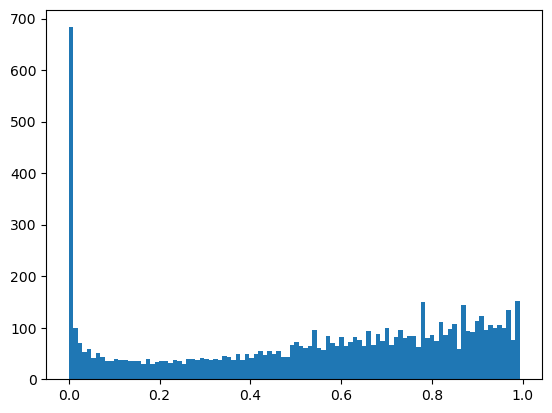

In [2]:
mean_neutral_fraction = np.load('mean_neutral_fraction.npy')

import matplotlib.pyplot as plt
plt.hist(mean_neutral_fraction, bins=100);

# $R^2$ Score
Measures relative dispersion of predictions wrt to true values to the dispersion of true values wrt to mean of true values

$$R^2 = 1 - \frac{\sum (xHI_{predictions} - xHI_{true})^2 }{\sum {(\bar xHI_{true}}- xHI_{true})^2}$$

hence when the true value of xHI is significantly lower then the mean goes even low, and the difference between these low values is also low causing

In [3]:
threshold = 0
print(len(mean_neutral_fraction[mean_neutral_fraction<10**(-threshold)]))
print(mean_neutral_fraction[mean_neutral_fraction<10**(-threshold)])

7203
[5.3163016e-01 2.5637348e-03 5.6258123e-04 ... 9.8899555e-09 9.8899555e-09
 9.8899555e-09]


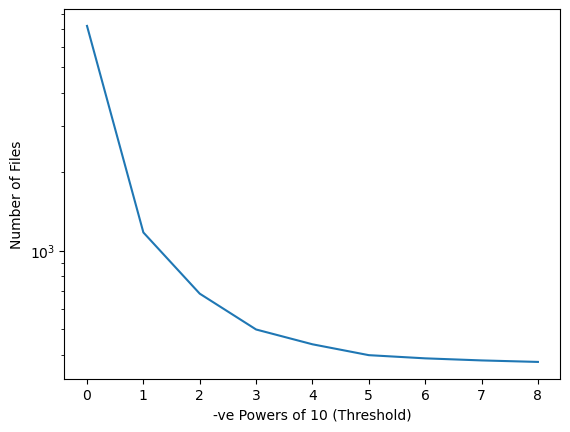

In [4]:
data_points = [len(mean_neutral_fraction[mean_neutral_fraction<10**(-threshold)]) for threshold in range(9)]
plt.plot(range(9), data_points)
plt.yscale('log')
plt.xlabel("-ve Powers of 10 (Threshold)")
plt.ylabel("Number of Files");

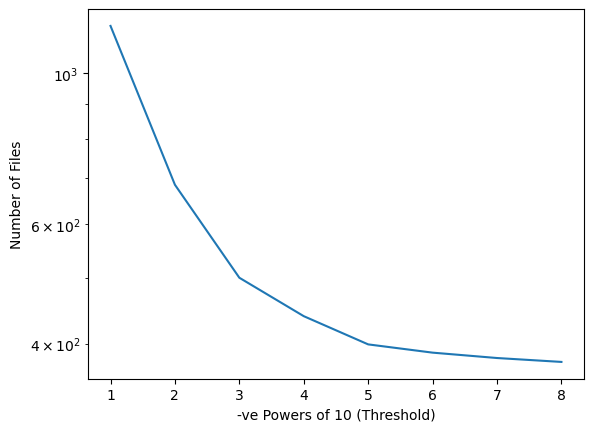

In [5]:
data_points = [len(mean_neutral_fraction[mean_neutral_fraction<10**(-threshold)]) for threshold in range(1, 9)]
plt.plot(range(1, 9), data_points)
plt.yscale('log')
plt.xlabel("-ve Powers of 10 (Threshold)")
plt.ylabel("Number of Files");

In [7]:
indices_mean_lesser = []
neutral_fraction_threshold = 9.89e-9# change this and see how correlation varies

for i in range(7203):
    if mean_neutral_fraction[i]<neutral_fraction_threshold:
        indices_mean_lesser.append(i)
print(len(indices_mean_lesser))

376


In [9]:
R2 = np.load('TheGreatRun/CosmoUiTResults/R2.npy')
indices_with_negative_r2 = []
r2_score_threshold = 0.0

for i in range(7203):
    if R2[i] < r2_score_threshold:
        indices_with_negative_r2.append(i)
print(len(indices_with_negative_r2))

1204


In [10]:
print("Median R2:", np.median(R2))

Median R2: 0.7420556545257568


Let's check whether the indices with lower

In [11]:
low_mean_indices_correlated_with_r2 = []
for i in indices_mean_lesser:
    if i in indices_with_negative_r2:
        low_mean_indices_correlated_with_r2.append(i)
print(len(low_mean_indices_correlated_with_r2))

376


In [12]:
print(f"Out of {len(indices_mean_lesser)} files with neutral fraction less than {neutral_fraction_threshold}, {len(low_mean_indices_correlated_with_r2)} files have less R2 score less than {r2_score_threshold}, in percent: {len(low_mean_indices_correlated_with_r2)/len(indices_mean_lesser)}")

Out of 376 files with neutral fraction less than 9.89e-09, 376 files have less R2 score less than 0.0, in percent: 1.0


In [13]:
# make a plot of variying thresholds of neutral fraction and R2 score (2D) to check the correlation

In [14]:
10**(-9)

1e-09

In [30]:
r2_score_threshold_range = [0.0, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
neutral_fraction_threshold_range = [9.89e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]

In [31]:
mean_neutral_fraction = np.load('mean_neutral_fraction.npy')
R2 = np.load('TheGreatRun/CosmoUiTResults/R2.npy')

def significance_of_low_nf(neutral_fraction_threshold, r2_score_threshold):
    indices_mean_lesser = []
    for i in range(7203):
        if mean_neutral_fraction[i]<neutral_fraction_threshold:
            indices_mean_lesser.append(i)
    num_indices_mean_lesser = len(indices_mean_lesser)
    
    
    indices_with_negative_r2 = []
    for i in range(7203):
        if R2[i] < r2_score_threshold:
            indices_with_negative_r2.append(i)
    num_indices_with_negative_r2=len(indices_with_negative_r2)
        
    low_mean_indices_correlated_with_r2 = []
    for i in indices_mean_lesser:
        if i in indices_with_negative_r2:
            low_mean_indices_correlated_with_r2.append(i)
    num_low_mean_indices_correlated_with_r2 = len(low_mean_indices_correlated_with_r2)
    
    try:
        signi_score =num_low_mean_indices_correlated_with_r2/num_indices_mean_lesser
    except Exception as e:
        signi_score=0
        
    return signi_score

In [32]:
print(significance_of_low_nf(0.0025, 0.0))

0.9963636363636363


In [33]:
print(neutral_fraction_threshold_range)

[9.89e-09, 1e-08, 1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 0.9, 0.99]


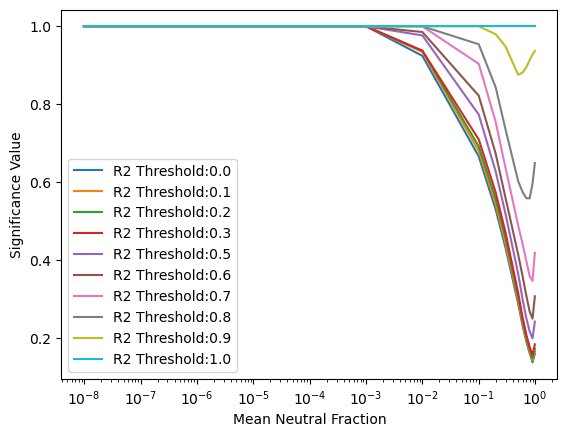

In [40]:
for i in r2_score_threshold_range:
    variation = [significance_of_low_nf(neutral_fraction_threshold, i) for neutral_fraction_threshold in neutral_fraction_threshold_range]
    plt.plot(neutral_fraction_threshold_range, variation, label=f'R2 Threshold:{i}')
plt.xscale('log')
plt.xlabel('Mean Neutral Fraction')
plt.ylabel('Significance Value')
plt.legend();

Significance value: signifies how likely a field with this mean neutral fraction will have R2 score below the threshold

In [36]:
corr_r2_neutral = []
for i in neutral_fraction_threshold_range:
    corr_r2 = []
    for j in r2_score_threshold_range:
        corr_r2.append(significance_of_low_nf(i,j))
    corr_r2_neutral.append(corr_r2)

In [37]:
corr_r2_neutral = np.array(corr_r2_neutral)

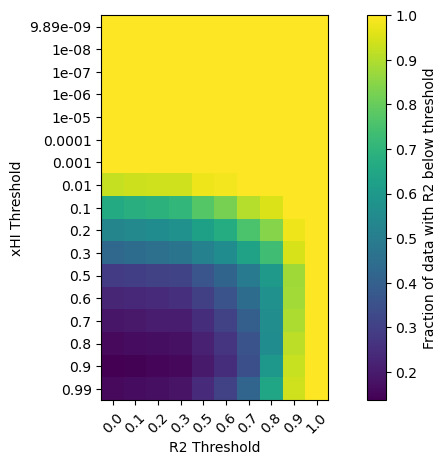

In [39]:
plt.figure(figsize=(10, 5))
plt.imshow(corr_r2_neutral)
plt.xticks(ticks=np.arange(len(r2_score_threshold_range)), labels=r2_score_threshold_range, rotation=45)
plt.yticks(ticks=np.arange(len(neutral_fraction_threshold_range)), labels=neutral_fraction_threshold_range)
plt.ylabel('xHI Threshold')
plt.xlabel('R2 Threshold')
plt.colorbar(label='Fraction of data with R2 below threshold');

## No matter what your R2 threshold is the data with xHI below 0.001 will always R2 threshold and since here the minimum R2 threshold is kept 0.0 (which implies model doesn't explain anything, and even substituting the output with mean would suffice to give R2=0.0) 

In [6]:
import numpy as np
mean_neutral_fraction = np.load('../Data/mean_neutral_fraction.npy')
j=0
for i in mean_neutral_fraction:
    if i<0.1:
        j+=1

In [7]:
j

1173